In [1]:
from llmtosql.model import WikiSQLModel
from llmtosql.trainer import Trainer
from llmtosql.dataloader import WikiSQLDataset
from llmtosql.utils.utils import plot_history, load_model, load_history
from matplotlib import pyplot as plt
import sys
import os
import json
import numpy as np
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
# os.environ['PYTORCH_ENABLE_MPS_FALLBACK']='1'
sys.path.insert(0, '..')

In [2]:
print(os.environ["VIRTUAL_ENV"])

/Users/albertomerango/Coeuraj/v_env


In [3]:
path = '../WikiSQL/data/dev.jsonl'

In [4]:
train_set =  WikiSQLDataset(type='dev')

In [5]:
# val_set = WikiSQLDataset(type='dev')

In [6]:
len(train_set.data)

8421

In [7]:
# datasets = (train_set, val_set)

In [8]:
model = WikiSQLModel(base_model_type='bert-base-cased')
try:
    model = load_model(model, 'model_output/model.pth')
except:
    print('No model loaded')

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [9]:
config = {
    'seed': 32,
    'scheduler': None,
    'optimizer': 'adam',
    'momentum': 0.9,
    'weight_decay': 0.0,
    'lr': 0.0005,
    'criterion': 'cross_entropy',
    'metric': 'accuracy',
    'pred_function': 'softmax',
    'model_dir': 'model_output',
    'backend': 'smddp'
}

In [10]:
trainer = Trainer(model, datasets=train_set, epochs=5, batch_size=32, is_parallel=False, **config)

2023-02-26 17:57.58 [info     ] Config inputs.                 config={'seed': 32, 'scheduler': None, 'optimizer': 'adam', 'momentum': 0.9, 'weight_decay': 0.0, 'lr': 0.0005, 'criterion': 'cross_entropy', 'metric': 'accuracy', 'pred_function': 'softmax', 'model_dir': 'model_output', 'backend': 'smddp'}
2023-02-26 17:57.58 [info     ] Loading the model.
2023-02-26 17:57.58 [info     ] Training on device: cpu.
2023-02-26 17:57.58 [info     ] Loading training and validation set.
2023-02-26 17:57.58 [info     ] Preparing the data.
2023-02-26 17:57.58 [debug    ] Processes 8421/8421 (100%) of train data


In [11]:
trainer.fit()

2023-02-26 17:57.58 [info     ] Start training..
2023-02-26 17:57.58 [info     ] ------------------------------ EPOCH 1 / 5 ------------------------------


100%|██████████| 264/264 [2:05:04<00:00, 28.42s/batch, loss=5.52, metric=0.173]   

2023-02-26 20:03.02 [info     ] Saving the model.


2023-02-26 20:03.03 [info     ] train loss: 5.517935618306652 - train accuracy: 0.17334280303030303
2023-02-26 20:03.03 [info     ] ------------------------------ EPOCH 2 / 5 ------------------------------


100%|██████████| 264/264 [2:08:27<00:00, 29.19s/batch, loss=3.51, metric=0.172]   

2023-02-26 22:11.30 [info     ] Saving the model.


2023-02-26 22:11.31 [info     ] train loss: 3.5055941835497366 - train accuracy: 0.17215909090909093
2023-02-26 22:11.31 [info     ] ------------------------------ EPOCH 3 / 5 ------------------------------


100%|██████████| 264/264 [2:08:59<00:00, 29.32s/batch, loss=4.48, metric=0.175]   

2023-02-27 00:20.31 [info     ] Saving the model.


2023-02-27 00:20.31 [info     ] train loss: 4.475565704432401 - train accuracy: 0.1748342803030303
2023-02-27 00:20.31 [info     ] ------------------------------ EPOCH 4 / 5 ------------------------------


100%|██████████| 264/264 [2:09:41<00:00, 29.47s/batch, loss=3.11, metric=0.181]   

2023-02-27 02:30.13 [info     ] Saving the model.


2023-02-27 02:30.14 [info     ] train loss: 3.112141349098899 - train accuracy: 0.18110795454545456
2023-02-27 02:30.14 [info     ] ------------------------------ EPOCH 5 / 5 ------------------------------


100%|██████████| 264/264 [2:08:58<00:00, 29.31s/batch, loss=3.7, metric=0.181]    

2023-02-27 04:39.13 [info     ] Saving the model.


2023-02-27 04:39.13 [info     ] train loss: 3.7005045237866314 - train accuracy: 0.1813210227272727
2023-02-27 04:39.13 [info     ] Training Complete.


In [12]:
trainer.save_history_('model_output')

2023-02-27 04:39.13 [info     ] Saving the training history.


In [13]:
history = load_history('model_output')

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

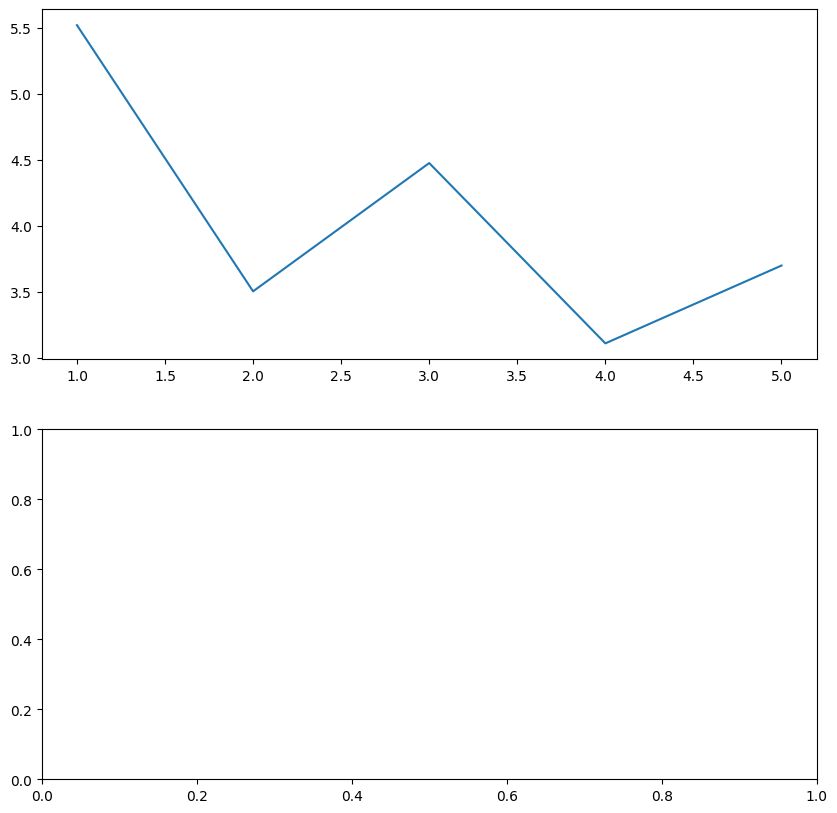

In [14]:
plot_history(history)

In [ ]:
model = MLModel()
model = load_model(model, 'model_output/model.pth')
test_loss, test_accuracy = trainer.test(model, trainer.val_loader)

In [ ]:
print(f'Model accuracy on test: {test_accuracy}')